<a href="https://colab.research.google.com/github/Rog10/Python/blob/main/Project_1_Google_Stock_Price_Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GOOGL**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
from scipy.stats import ttest_ind


In [ ]:
GOOGL = pd.read_csv('/content/GOOGL (1).csv')


In [ ]:
GOOGL.head().round(2)

,Time,Date,Open,High,Low,Close,Adj Close,Volume
0,0,8/19/04,2.50,2.60,2.40,2.51,2.51,893181924
1,1,8/20/04,2.53,2.73,2.52,2.71,2.71,456686856
2,2,8/23/04,2.77,2.84,2.73,2.74,2.74,365122512
3,3,8/24/04,2.78,2.79,2.59,2.62,2.62,304946748
4,4,8/25/04,2.63,2.70,2.60,2.65,2.65,183772044


#Descriptive Statistics of Closing Price

In [ ]:
#Descriptive Statistics of Closing prices.
close_summary = GOOGL['Close'].describe()
print(close_summary)

count    4678.000000
mean       38.406417
std        35.315119
min         2.502753
25%        12.702640
50%        25.758643
75%        54.789500
max       149.838501
Name: Close, dtype: float64


In [ ]:
#Mean
print("The mean of GOOGl closing prices is", GOOGL['Close'].mean())

The mean of GOOGl closing prices is 38.40641678174434


In [ ]:
#Median
print("The median of GOOGl closing prices is", GOOGL['Close'].median())

The median of GOOGl closing prices is 25.758643


In [ ]:
#Mode
print("The mode of GOOGl closing prices is", GOOGL['Close'].mode()[0])

The mode of GOOGl closing prices is 14.514515


In [ ]:
#Standard Deviation
print("The Standard Deviation of GOOGl closing prices is", GOOGL['Close'].std())

The Standard Deviation of GOOGl closing prices is 35.31511919668098


In [ ]:
#Range
print("The range of GOOGl closing prices is",GOOGL['Close'].max() - GOOGL['Close'].min())

The range of GOOGl closing prices is 147.335748


In [ ]:
#Minimum
print("The minimum of GOOGl closing prices is", GOOGL['Close'].min())

The minimum of GOOGl closing prices is 2.502753


In [ ]:
#Maximum
print("The maximum of GOOGl closing prices is",GOOGL['Close'].max())

The maximum of GOOGl closing prices is 149.838501


In [ ]:
# IQR of Close
print("The IQR of GOOGl closing prices is", GOOGL['Close'].quantile(0.25) - GOOGL['Close'].quantile(0.75))

The IQR of GOOGl closing prices is -42.086859999999994


# All of GOOGL Dates & Closing Price

In [ ]:
# All Dates starting from 8/19/04 to recently 3/20/23.
# Including All of Closing prices.
GOOGL[['Date','Close']].round(2)

,Date,Close
0,8/19/04,2.51
1,8/20/04,2.71
2,8/23/04,2.74
3,8/24/04,2.62
4,8/25/04,2.65
...,...,...
4673,3/14/23,93.97
4674,3/15/23,96.11
4675,3/16/23,100.32
4676,3/17/23,101.62


# Visualizations of GOOGL Dates and Closing Price

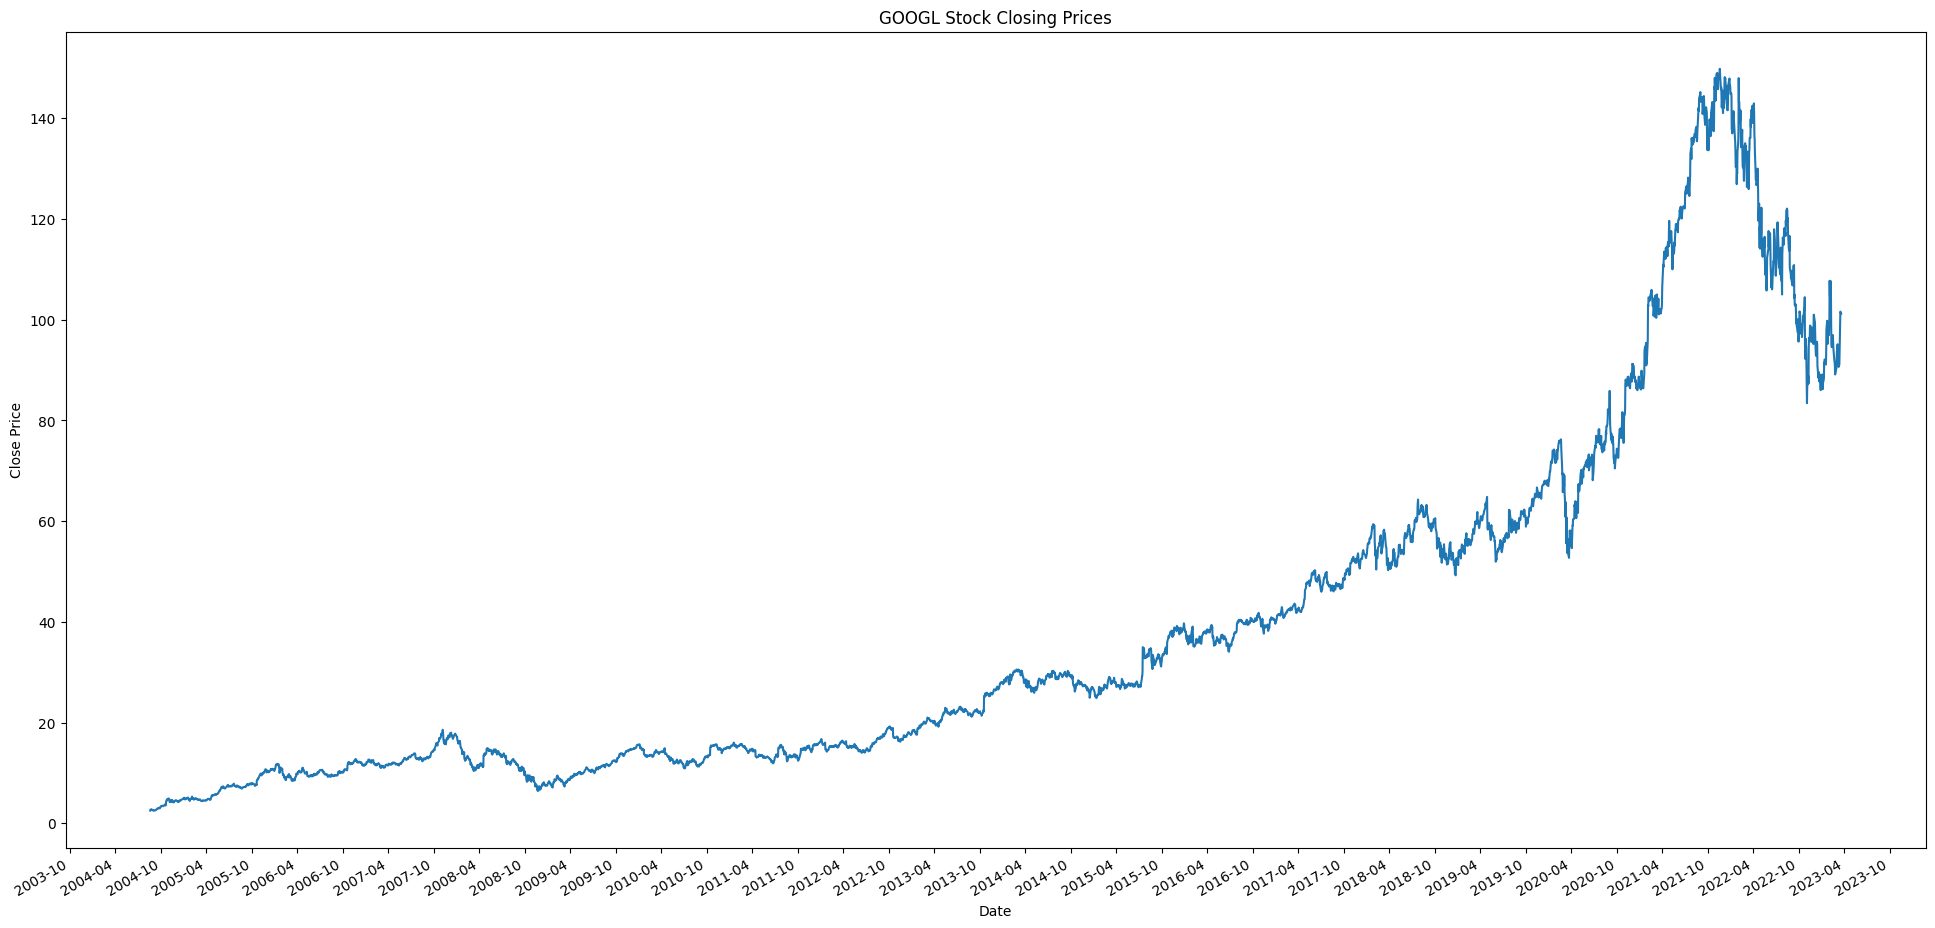

In [ ]:
plt.figure(figsize=(24, 12))
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])
plt.plot(GOOGL['Date'], GOOGL['Close'].round(2))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GOOGL Stock Closing Prices')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gcf().autofmt_xdate()
plt.show()

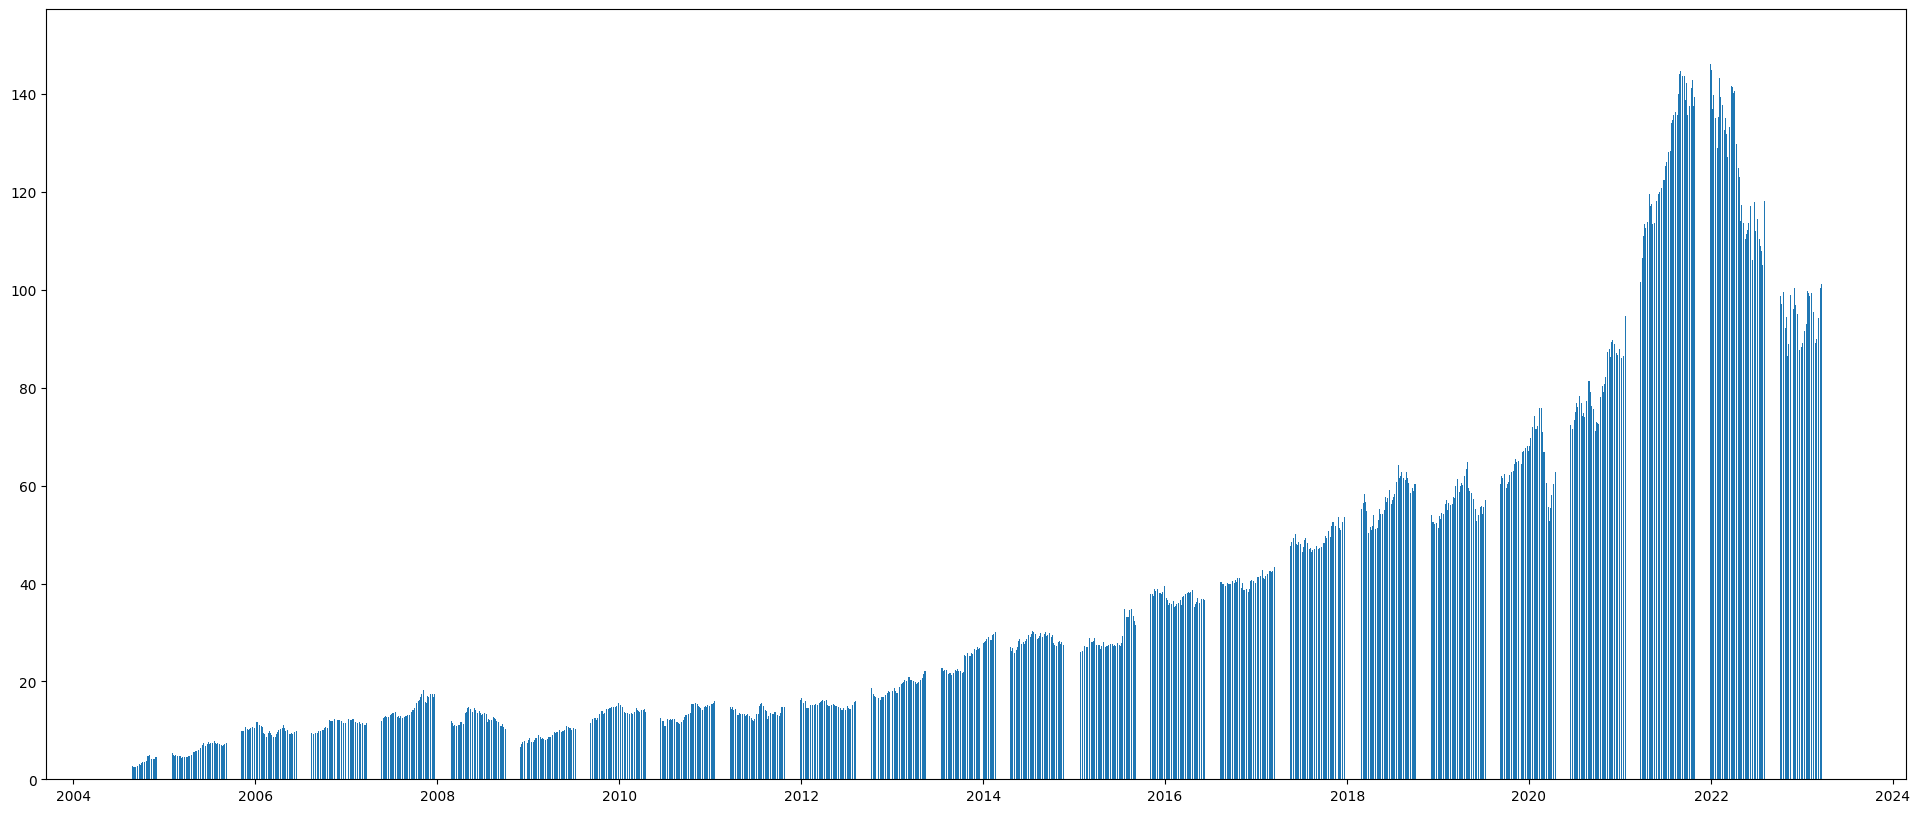

In [ ]:
plt.figure(figsize=(24, 10))
barhist = plt.bar(GOOGL['Date'], GOOGL['Close'])

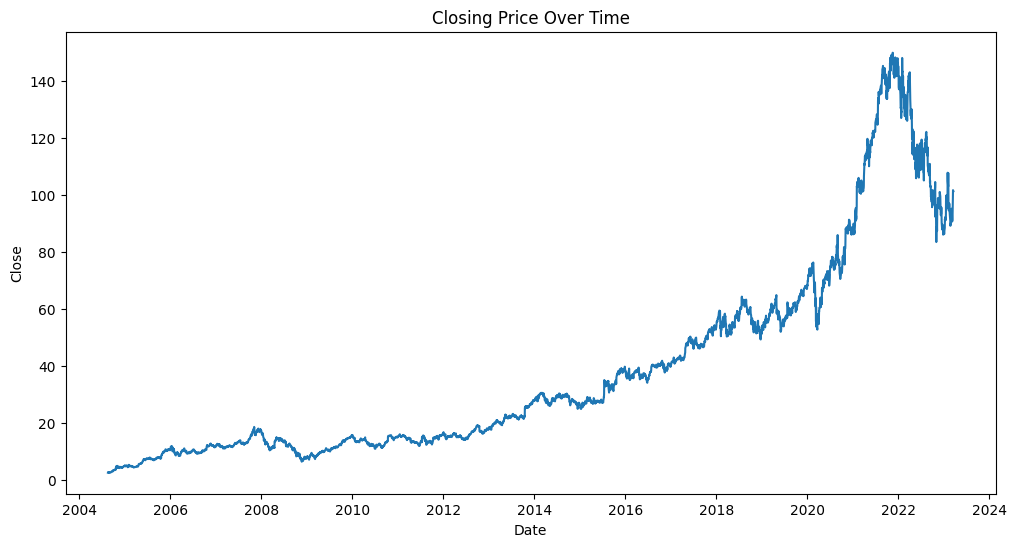

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(GOOGL['Date'], GOOGL['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

You can notice the sharp drop 2020 when the Pandemic started

# Prepandemic

In [ ]:
#All Dates and Closing prices before the Pandemic starting on Mach 11,2020.
prepandemic = GOOGL.loc[GOOGL['Time'] <= 3916]
prepandemic [['Date','Close']]

,Date,Close
0,2004-08-19,2.511011
1,2004-08-20,2.710460
2,2004-08-23,2.737738
3,2004-08-24,2.624374
4,2004-08-25,2.652653
...,...,...
3912,2020-03-05,65.737999
3913,2020-03-06,64.787003
3914,2020-03-09,60.789501
3915,2020-03-10,63.758499


In [ ]:
#Mean of closing price during the prepandemic
prepandemic['Close'].mean()

25.337178631350522

In [ ]:
# T-test all GOOGL closing price and postpandeic price.
t_test, p_values = ttest_ind(GOOGL['Close'], prepandemic['Close'])
print("t-test:", t_test)
print("p-value:", p_values)

t-test: 21.033829114063263
p-value: 8.121725942979947e-96


# Postpandemic

In [ ]:
#All Dates and Closing prices After the Pandemic starts on Mach 11,2020.
postpandemic = GOOGL.loc[GOOGL['Time'] >= 3916]
postpandemic [['Date','Close']]

,Date,Close
3916,2020-03-11,60.544998
3917,2020-03-12,55.577499
3918,2020-03-13,60.713501
3919,2020-03-16,53.650002
3920,2020-03-17,55.903000
...,...,...
4673,2023-03-14,93.970001
4674,2023-03-15,96.110001
4675,2023-03-16,100.320000
4676,2023-03-17,101.620003


In [ ]:
#Mean of closing price during the post pandemic
postpandemic['Close'].mean()

105.61684252493438

In [ ]:
# T-test all GOOGL closing price and postpandeic price.
t_test, p_values = ttest_ind(GOOGL['Close'], postpandemic['Close'])
print("t-test:", t_test)
print("p-value:", p_values)

t-test: -50.484310890230965
p-value: 0.0


# Prepandemic & Postpandemic

In [ ]:
# T-test both prepandemic closing price and postpandeic price.
t_test, p_values = ttest_ind(prepandemic['Close'], postpandemic['Close'])
print("t-test:", t_test)
print("p-value:", p_values)

t-test: -105.66154131301036
p-value: 0.0


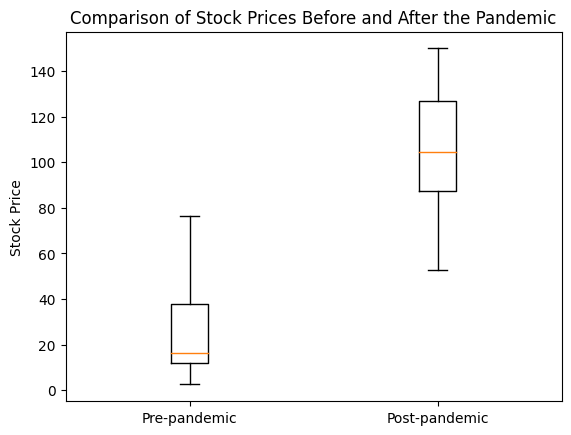

In [ ]:
# Box plot comparing pre- and post-pandemic stock prices
data = [prepandemic['Close'], postpandemic['Close']]
labels = ['Pre-pandemic', 'Post-pandemic']

plt.boxplot(data, labels=labels)
plt.title('Comparison of Stock Prices Before and After the Pandemic')
plt.ylabel('Stock Price')
plt.show()

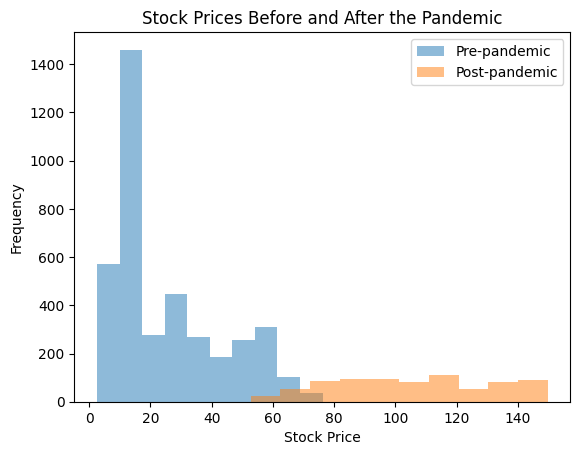

In [ ]:
#  Histograms comparing pre- and post-pandemic stock prices
plt.hist(prepandemic['Close'], alpha=0.5, label='Pre-pandemic')
plt.hist(postpandemic['Close'], alpha=0.5, label='Post-pandemic')

plt.title('Stock Prices Before and After the Pandemic')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

# One Month (30 Days) Before & After the Pandemic

In [ ]:
oneMonthbefore = GOOGL.loc[(GOOGL['Time'] <= 3916) & (GOOGL['Time'] >= 3886)]
oneMonthbefore [['Date', 'Close']].round(2)


,Date,Close
3886,2020-01-28,72.53
3887,2020-01-29,72.83
3888,2020-01-30,72.71
3889,2020-01-31,71.64
3890,2020-02-03,74.13
3891,2020-02-04,72.27
3892,2020-02-05,72.30
3893,2020-02-06,73.80
3894,2020-02-07,73.96
3895,2020-02-10,75.43


In [ ]:
#Mean of closing price during one month before the pandemic
oneMonthbefore['Close'].mean()

70.97814522580646

In [ ]:
oneMonthafter = GOOGL.loc[(GOOGL['Time'] >= 3916) & (GOOGL['Time'] <= 3946)]
oneMonthafter [['Date', 'Close']].round(2)

,Date,Close
3916,2020-03-11,60.54
3917,2020-03-12,55.58
3918,2020-03-13,60.71
3919,2020-03-16,53.65
3920,2020-03-17,55.90
3921,2020-03-18,54.56
3922,2020-03-19,55.58
3923,2020-03-20,53.41
3924,2020-03-23,52.71
3925,2020-03-24,56.50


In [ ]:
#Mean of closing price during the one month after the pandemic
oneMonthafter['Close'].mean()

58.43461287096775

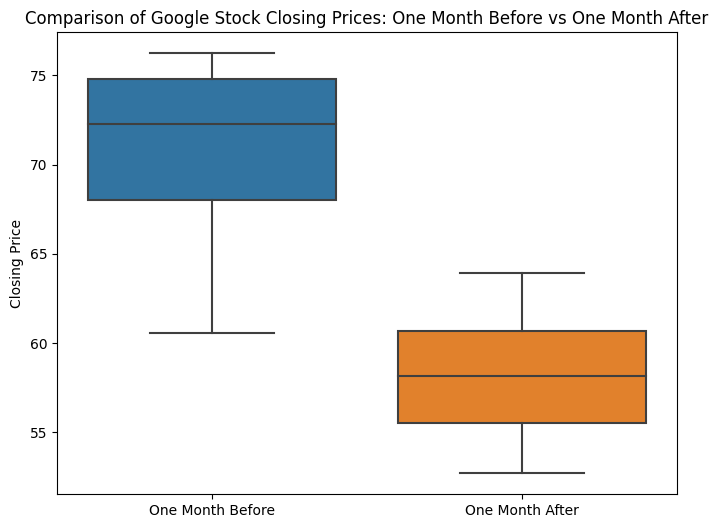

In [ ]:
viz_df = pd.concat([oneMonthbefore['Close'].reset_index(drop=True), oneMonthafter['Close'].reset_index(drop=True)], axis=1)
viz_df.columns = ['One Month Before', 'One Month After']

plt.figure(figsize=(8, 6))
sns.boxplot(data=viz_df)
plt.title('Comparison of Google Stock Closing Prices: One Month Before vs One Month After')
plt.ylabel('Closing Price')
plt.show()

Massive drop in closing prices.

In [ ]:
# T-test both oneMonthbefore closing price and oneMonthafter price.
t_test, p_values = ttest_ind(oneMonthbefore['Close'], oneMonthafter['Close'])
print("t-test:", t_test)
print("p-value:", p_values)

t-test: 12.077505325129778
p-value: 1.047185717914457e-17


# One Year Before and After the Pandemic

In [ ]:
# Exactly one year of all closing prices and dates before the pandmic 3/11/19 - 3/11/20.
oneYearbefore = GOOGL.loc[(GOOGL['Time'] <= 3916) & (GOOGL['Time'] >= 3663)]
oneYearbefore [['Date', 'Close']].round(2)

,Date,Close
3663,2019-03-11,58.96
3664,2019-03-12,59.86
3665,2019-03-13,59.95
3666,2019-03-14,59.63
3667,2019-03-15,59.51
...,...,...
3912,2020-03-05,65.74
3913,2020-03-06,64.79
3914,2020-03-09,60.79
3915,2020-03-10,63.76


In [ ]:
#Mean of closing price during the one year before the pandemic
oneYearbefore['Close'].mean()

62.522379866141726

In [ ]:
## Exactly one year of all closing prices and dates After the pandmic 3/11/20 - 3/11/21.
oneYearafter = GOOGL.loc[(GOOGL['Time'] >= 3916) & (GOOGL['Time'] <= 4168)]
oneYearafter [['Date', 'Close']].round(2)

,Date,Close
3916,2020-03-11,60.54
3917,2020-03-12,55.58
3918,2020-03-13,60.71
3919,2020-03-16,53.65
3920,2020-03-17,55.90
...,...,...
4164,2021-03-05,104.85
4165,2021-03-08,100.38
4166,2021-03-09,102.02
4167,2021-03-10,101.81


In [ ]:
#Mean of closing price during the one year after the pandemic
oneYearafter['Close'].mean()

78.81287342687746

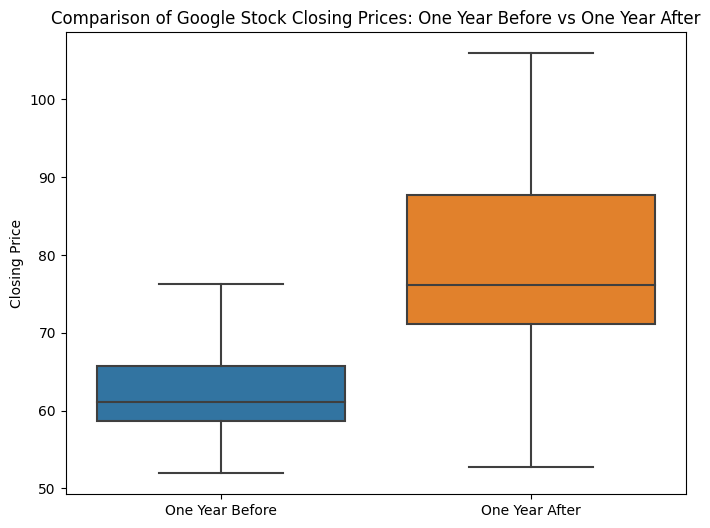

In [ ]:
viz_df = pd.concat([oneYearbefore['Close'].reset_index(drop=True), oneYearafter['Close'].reset_index(drop=True)], axis=1)
viz_df.columns = ['One Year Before', 'One Year After']

plt.figure(figsize=(8, 6))
sns.boxplot(data=viz_df)
plt.title('Comparison of Google Stock Closing Prices: One Year Before vs One Year After')
plt.ylabel('Closing Price')
plt.show()

A drastic increase in closing price from one year later compared to one year before.

In [ ]:
# T-test both oneYearbefore closing price and oneYearafter price.
t_test, p_values = ttest_ind(oneYearbefore['Close'], oneYearafter['Close'])
print("t-test:", t_test)
print("p-value:", p_values)

t-test: -18.594555569129312
p-value: 3.5437781113922383e-59


# Two Years Before & After the Pandemic

In [ ]:
# Exactly two years of all closing prices and dates before the pandmic 3/11/18 - 3/11/20
twoYearsbefore = GOOGL.loc[(GOOGL['Time'] <= 3916) & (GOOGL['Time'] >= 3413)]
twoYearsbefore [['Date', 'Close']].round(2)

,Date,Close
3413,2018-03-12,58.30
3414,2018-03-13,57.00
3415,2018-03-14,57.44
3416,2018-03-15,57.53
3417,2018-03-16,56.72
...,...,...
3912,2020-03-05,65.74
3913,2020-03-06,64.79
3914,2020-03-09,60.79
3915,2020-03-10,63.76


In [ ]:
#Mean of closing price during the two years before the pandemic
oneYearafter['Close'].mean()

78.81287342687746

In [ ]:
# Exactly two years of all closing prices and dates after the pandmic 3/11/20 - 3/11/22
twoYearsafter = GOOGL.loc[(GOOGL['Time'] >= 3916) & (GOOGL['Time'] <= 4421)]
twoYearsafter [['Date', 'Close']].round(2)

,Date,Close
3916,2020-03-11,60.54
3917,2020-03-12,55.58
3918,2020-03-13,60.71
3919,2020-03-16,53.65
3920,2020-03-17,55.90
...,...,...
4417,2022-03-07,126.38
4418,2022-03-08,127.10
4419,2022-03-09,133.42
4420,2022-03-10,132.43


In [ ]:
#Mean of closing price during two years after the pandemic
twoYearsafter['Close'].mean()

105.05202962845848

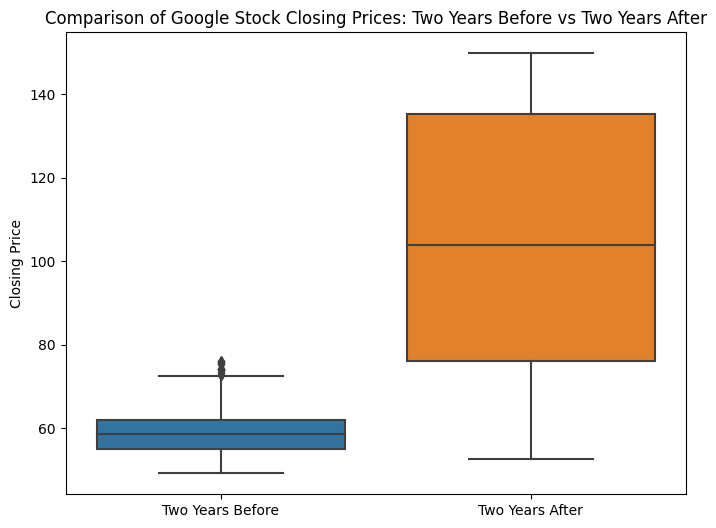

In [ ]:
viz_df = pd.concat([twoYearsbefore['Close'].reset_index(drop=True), twoYearsafter['Close'].reset_index(drop=True)], axis=1)
viz_df.columns = ['Two Years Before', 'Two Years After']

plt.figure(figsize=(8, 6))
sns.boxplot(data=viz_df)
plt.title('Comparison of Google Stock Closing Prices: Two Years Before vs Two Years After')
plt.ylabel('Closing Price')
plt.show()

Huge increase increase in closing price from two years later compared to two years before.

In [ ]:
# T-test both twoYearsbefore closing price and twoYearsafter price.
t_test, p_values = ttest_ind(twoYearsbefore['Close'], twoYearsafter['Close'])
print("t-test:", t_test)
print("p-value:", p_values)

t-test: -34.43695181167708
p-value: 2.0127232496976577e-172


# March 31st Forecast

In [ ]:
#Linear regresion
model = smf.ols('Close ~ Time', data = GOOGL).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 1.478e+04
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:32:03   Log-Likelihood:                -19977.
No. Observations:                4678   AIC:                         3.996e+04
Df Residuals:                    4676   BIC:                         3.997e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.8875      0.506    -29.405      0.0

eval_env: 1
eval_env: 1


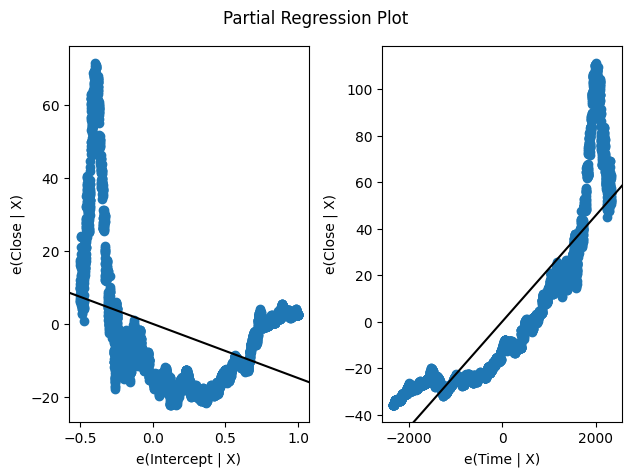

In [ ]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

In [ ]:
#March 31 = b0+b1*time
LastdayofMarch = -14.875+0.0228*4689
print("The prediction price for Mach 31 will be", round(LastdayofMarch))


The prediction price for Mach 31 will be 92


In [ ]:
LastdayofMarch

92.0342